In [1]:
import random
import pandas as pd
import time
import matplotlib.pyplot as plt

from collections import deque
import heapq

# Graph Search 3

## What if we wanted to explore nodes in a different order other than `DFS` and `BFS` ordering? 

<div>
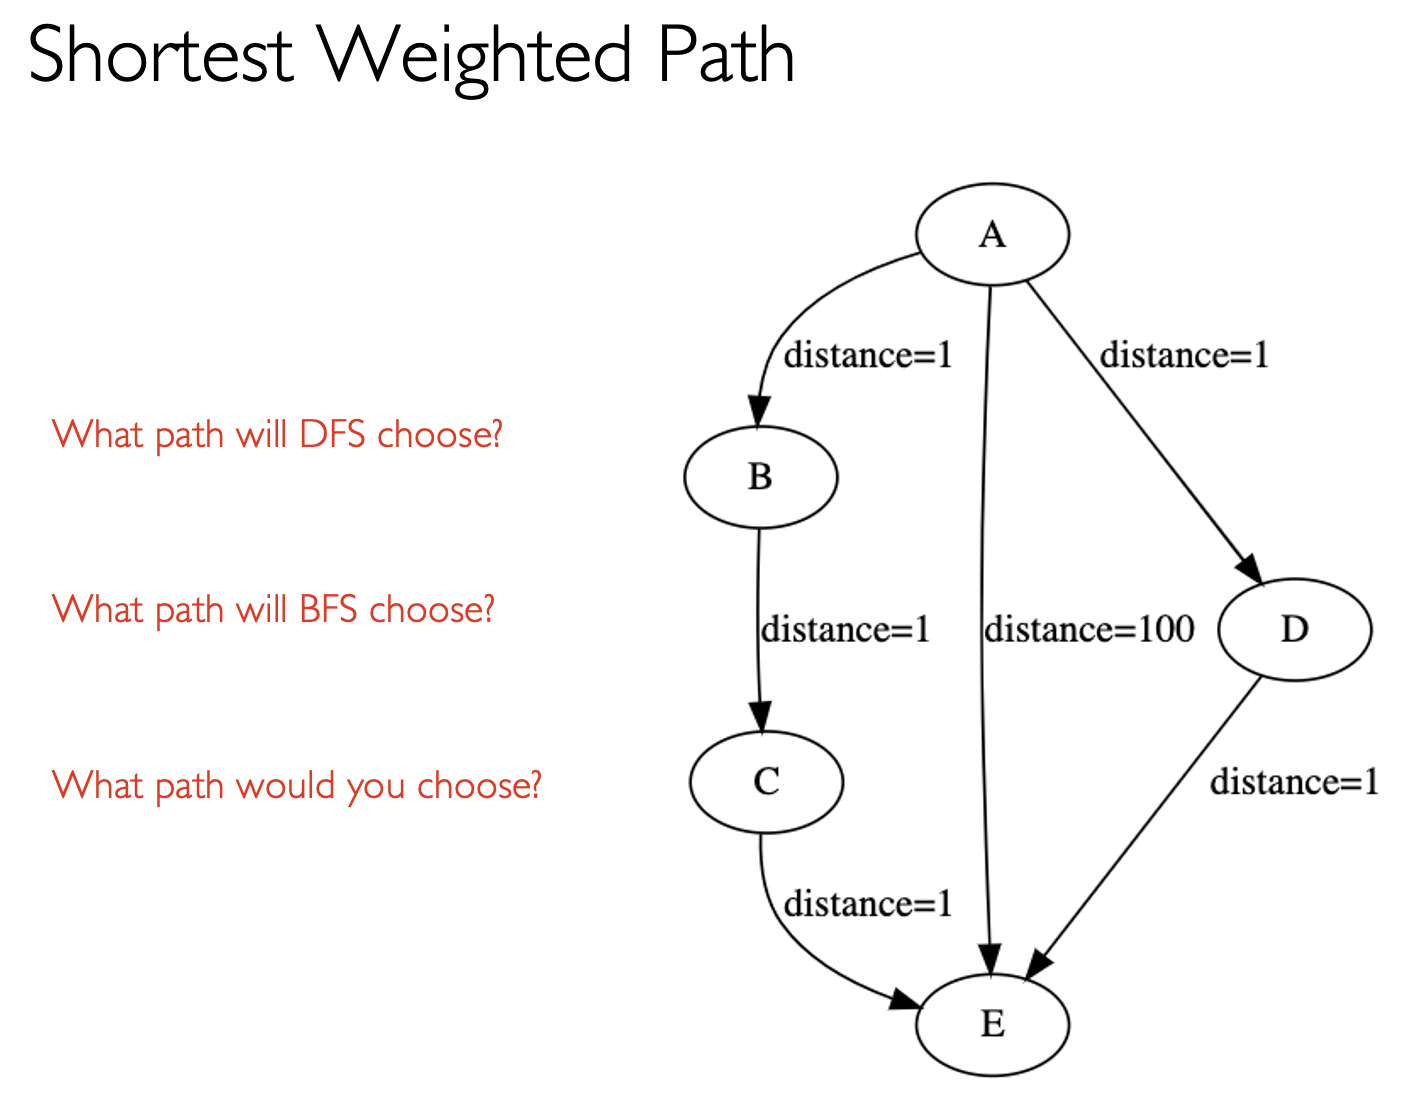
</div>

## Using `heapq` (priority queue)

<div>
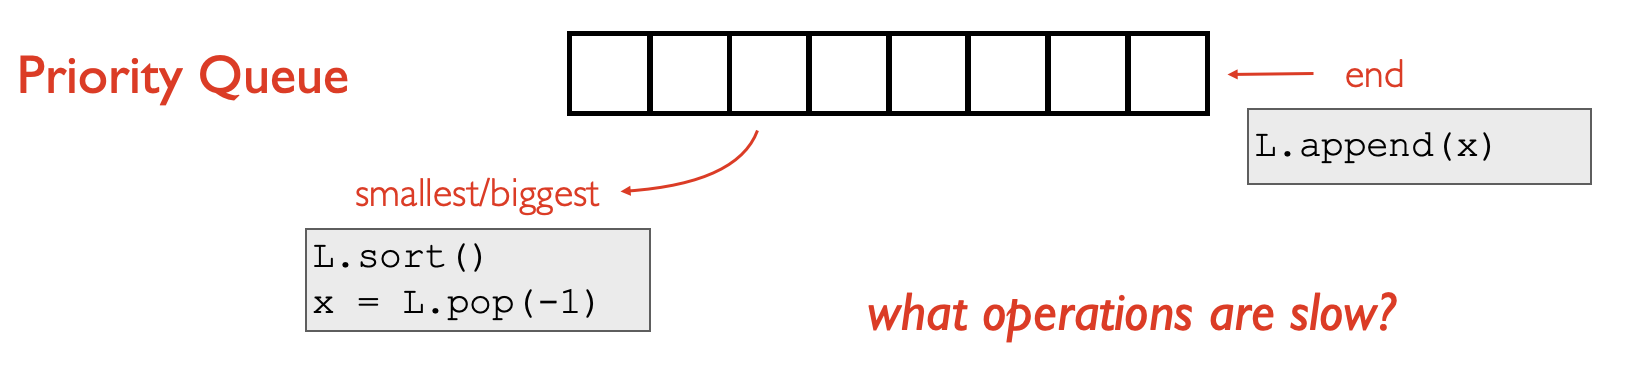
</div>

### Characteristics: 
- Uses a tree structure behind the sence. 
- Unlike `deque`, `heapq` is not a type by itself.
- `heapq` includes a set of functions to make a list into a priority queue.
- Operations:
    - `heapq.heapify`
        - shuffles around the values so that the smallest value is in the front
        - does so in **O(N)** time 
    - `heapq.heappush(LIST, VAL)`:
        - adds VAL to the list
        - shuffles around the values so that the smallest value is in the front
        - does so in **O(log N)** time
    - `val = heapq.heappop(LIST)`
        - removes the **smallest** item from the list
        - shuffles around the values so that the smallest value is in the front
        - does so in **O(log N)** time

In [2]:
vals = [random.randint(1, 10) for _ in range(10)]
vals

[9, 8, 5, 2, 2, 5, 9, 3, 9, 3]

In [3]:
heapq.heapify(vals)
vals

[2, 2, 5, 3, 3, 5, 9, 9, 9, 8]

In [4]:
data = []
vals = [random.randint(1, 10) for _ in range(10)]
for val in vals:
    heapq.heappush(data, val)
data

[1, 2, 3, 3, 7, 9, 7, 10, 7, 10]

In [5]:
while len(data) > 5:
    val = heapq.heappop(data)
    print(val, data)

1 [2, 3, 3, 7, 7, 9, 7, 10, 10]
2 [3, 3, 7, 7, 7, 9, 10, 10]
3 [3, 7, 7, 7, 10, 9, 10]
3 [7, 7, 9, 7, 10, 10]
7 [7, 7, 9, 10, 10]


### Benchmarking `stack`, `queue`, and `priority queue` for performance

,stack,queue,prio queue
0,0.110626,0.165462,0.164747
2000,0.085831,0.292778,9.263277
4000,0.099897,0.541210,15.599728
6000,0.098705,0.857115,22.127867
8000,0.101805,1.093626,29.430628
10000,0.088692,1.356840,36.466599


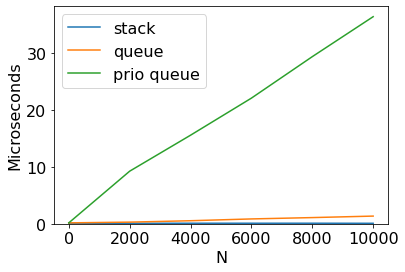

In [6]:
iters = 1000

def benchmark_microsec(data, pattern):
    """
    Benchmarking "stack", "queue", "priority queue" 
    implementations using a list data structure
    """
    t0 = time.time()
    # measure bad ways to implement the patterns (all with a list!)
    for i in range(iters):
        if pattern == "stack":
            data.append(i % 10)
            _ = data.pop(-1)
        elif pattern == "queue":
            data.append(i % 10)
            _ = data.pop(0)
        elif pattern == "prio queue":
            data.append(i % 10)
            data.sort()
            _ = data.pop(0)
        else:
            raise Exception("pattern not supported")
    t1 = time.time()
    return (t1-t0) / iters * 1e6

df = pd.DataFrame()
for N in range(0, 10001, 2000):
    df.loc[N,"stack"] = benchmark_microsec([1]*N, "stack")
    df.loc[N,"queue"] = benchmark_microsec([1]*N, "queue")
    df.loc[N,"prio queue"] = benchmark_microsec([1]*N, "prio queue")

plt.rcParams["font.size"] = 16
df.plot.line(ylim=0)
plt.xlabel("N")
plt.ylabel("Microseconds")
df

,stack,queue,prio queue
0,0.113932,0.098092,0.183550
1000,0.085692,0.098186,0.348706
2000,0.086267,0.096328,0.374217
3000,0.085195,0.097365,0.391771
4000,0.084689,0.098717,0.394496
5000,0.086980,0.096691,0.407606
6000,0.089591,0.102860,0.420014
7000,0.086095,0.101237,0.408515
8000,0.086531,0.098573,0.411607
9000,0.086881,0.097027,0.425745


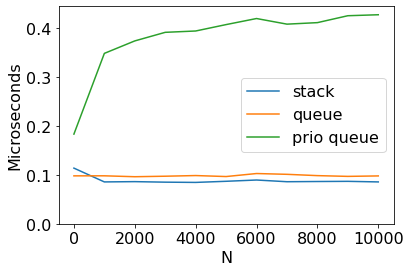

In [7]:
iters = 1000000

def benchmark_microsec_v2(data, pattern):
    """
    Benchmarking "stack", "queue", "priority queue" 
    implementations using list, deque, and heapq list data structures
    """
    t0 = time.time()
    # measure bad ways to implement the patterns (all with a list!)
    for i in range(iters):
        if pattern == "stack":
            data.append(i % 10)
            _ = data.pop(-1)
        elif pattern == "queue":
            # use a deque instead of a list
            data.append(i % 10)
            _ = data.popleft()
        elif pattern == "prio queue":
            # use a heapq instead of a list
            heapq.heappush(data, i % 10)
            _ = heapq.heappop(data)
            
        else:
            raise Exception("pattern not supported")
    t1 = time.time()
    return (t1-t0) / iters * 1e6

df = pd.DataFrame()
for N in range(0, 10001, 1000):
    df.loc[N,"stack"] = benchmark_microsec_v2([1]*N, "stack")
    df.loc[N,"queue"] = benchmark_microsec_v2(deque([1]*N), "queue")
    data = [1]*N
    heapq.heapify(data)
    df.loc[N,"prio queue"] = benchmark_microsec_v2(data, "prio queue")

plt.rcParams["font.size"] = 16
df.plot.line(ylim=0)
plt.xlabel("N")
plt.ylabel("Microseconds")
df